<a href="https://colab.research.google.com/github/ChenZijiSubset/coding_class/blob/main/biodiversitywithAnswer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Golden Plains Roadside Biodiversity

Golden Plains Shire (Australia) is responsible for managing 1834 kilometres of road reserves. Road reserves are not only used for transport but also act as service corridors, in fire prevention, recreation, and occasionally agricultural pursuits. Native vegetation on roadsides is important flora and fauna habitat and landscape character.

In 2014, Golden Plains Shire acquired funding through the Victorian Adaptation and Sustainability Partnership (VASP) to undertake Councils ‘Building Adaptive Capacity on Roadsides’ project. The Project was designed to identify significant environmental assets on roadsides, improve roadside management practices and reduce Council’s risk of potential breaches against Federal and State environmental legislation.

The council made this <a href='https://data.gov.au/data/dataset/golden-plains-roadside-biodiversity'>dataset available here</a>.<br>
![plain](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/Mount_Conner%2C_August_2003.jpg/375px-Mount_Conner%2C_August_2003.jpg)
<br>

🎯 Today, we will work with a simplified version of this real dataset. The dataset contains a number of biodiversity observations as well as a biodiversity score (`RCACScore`). This exercise consists of the data preparation and feature selection techniques you have learnt: our goal is to predict via linear regression the `RCACScore` using the minimum number of features necessary to maintain a high score.

⚠️ This is a long exercises, and it will require you to use many pandas and numpy skills, as well as to plot histograms and line plot with matplotlib. In particular, several questions can best be answered by transforming dataframe series into numpy through some transformers, but then re-transforming the results into a pandas dataframe so you can use the convenience of pandas methods (sorting, for instance). There are several ways to get to the same end result but think of the easiest and most efficient way. If you get stuck, ask a TA!

👇 Load the data into this notebook as a pandas dataframe named `df`, and display its first 5 rows.

In [ ]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('biodiversity.csv')
df.head(5)

,ZoneName,LengthM,SiteCode,DateStart,DateFinish,ZoneDescription,Comments,Comments2,RoadType,RCACScore,...,Majorweeds,Locality,LandFormLS,LandForm00,SoilType,EVCCode,EVCNotes,EVCSource,Origin,Recommenda
0,bellclover court,3,g252,17/09/2014,17/09/2014,"semi-urban, few remnants",NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,47,47,survey,NaN,NaN
1,bellclover court,3,g252,17/09/2014,17/09/2014,"semi-urban, few remnants",NaN,roadside only scores hcv due to listed species...,NaN,17,...,NaN,NaN,NaN,NaN,NaN,47,47,survey,NaN,NaN
2,westgate road,9,g086,17/09/2014,17/09/2014,"semi-urban, few remnants",NaN,NaN,NaN,3,...,NaN,NaN,NaN,NaN,NaN,47,47,survey,NaN,NaN
3,westgate road,9,g086,17/09/2014,17/09/2014,"semi-urban, few remnants",NaN,NaN,NaN,6,...,NaN,NaN,NaN,NaN,NaN,47,47,survey,NaN,NaN
4,haddon common road,9,g083b,17/09/2014,17/09/2014,forest,NaN,NaN,NaN,15,...,NaN,NaN,NaN,NaN,NaN,20,20,survey,NaN,NaN


Spend a bit of time exploring the dataset, for instance looking at the different columns it contains, it's data types, any missing values. You could use the `describe()` function as a starting point to have an idea of what is going on. Then proceed with the exercise.

In [ ]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells
df.describe()

,LengthM,RoadType,RCACScore,RoadWidthM,WidthVarie,RCACWidth,RCACTreesW,RCACTreesS,RCACGround,RCACGrassl,...,PowerlineD,OverallFue,GroundFuel,ElevatedFu,BarkHazard,Majorweeds,LandForm00,EVCCode,Origin,Recommenda
count,3245.000000,0.0,3245.000000,3228.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,...,3094.000000,0.0,0.0,0.0,0.0,0.0,0.0,3245.000000,0.0,0.0
mean,3.607396,NaN,14.326965,5.691140,0.164869,1.334669,0.214484,1.352234,1.942065,0.143606,...,307.840013,NaN,NaN,NaN,NaN,NaN,NaN,567.481048,NaN,NaN
std,2.515661,NaN,9.153407,4.143576,0.371119,0.525124,0.581973,0.845383,0.233657,0.622997,...,4.130345,NaN,NaN,NaN,NaN,NaN,NaN,810.552501,NaN,NaN
min,1.000000,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,291.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN
25%,1.000000,NaN,7.000000,4.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,...,309.000000,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,NaN,NaN
50%,3.000000,NaN,12.000000,4.000000,0.000000,1.000000,0.000000,2.000000,2.000000,0.000000,...,309.000000,NaN,NaN,NaN,NaN,NaN,NaN,175.000000,NaN,NaN
75%,5.000000,NaN,19.000000,6.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000,...,309.000000,NaN,NaN,NaN,NaN,NaN,NaN,656.000000,NaN,NaN
max,9.000000,NaN,35.000000,80.000000,1.000000,3.000000,3.000000,2.000000,2.000000,5.000000,...,335.000000,NaN,NaN,NaN,NaN,NaN,NaN,2247.000000,NaN,NaN


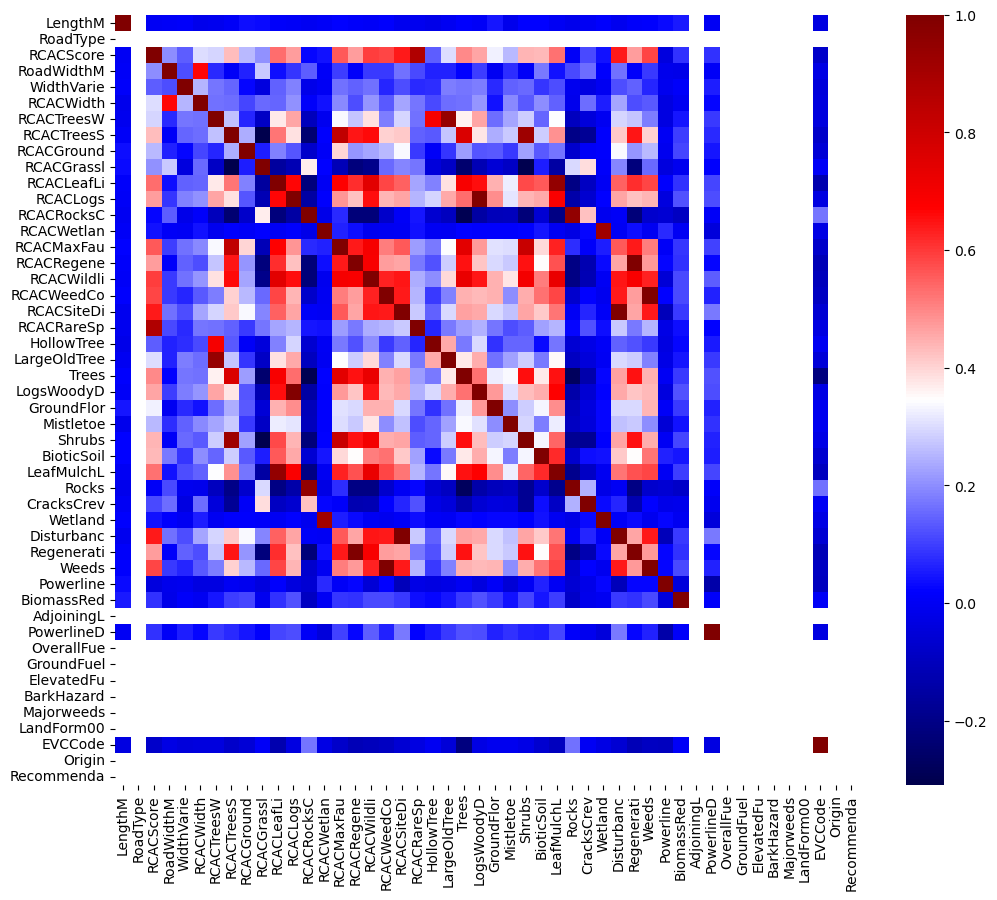

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,10))
corr = df.select_dtypes(['Int64', 'Float64']).corr()

sns.heatmap(corr, cmap='seismic', ax=ax);

In [ ]:
df.select_dtypes(['Int64', 'Float64']).columns

Index(['LengthM', 'RoadType', 'RCACScore', 'RoadWidthM', 'WidthVarie',
       'RCACWidth', 'RCACTreesW', 'RCACTreesS', 'RCACGround', 'RCACGrassl',
       'RCACLeafLi', 'RCACLogs', 'RCACRocksC', 'RCACWetlan', 'RCACMaxFau',
       'RCACRegene', 'RCACWildli', 'RCACWeedCo', 'RCACSiteDi', 'RCACRareSp',
       'HollowTree', 'LargeOldTree', 'Trees', 'LogsWoodyD', 'GroundFlor',
       'Mistletoe', 'Shrubs', 'BioticSoil', 'LeafMulchL', 'Rocks',
       'CracksCrev', 'Wetland', 'Disturbanc', 'Regenerati', 'Weeds',
       'Powerline', 'BiomassRed', 'AdjoiningL', 'PowerlineD', 'OverallFue',
       'GroundFuel', 'ElevatedFu', 'BarkHazard', 'Majorweeds', 'LandForm00',
       'EVCCode', 'Origin', 'Recommenda'],
      dtype='object')

# Duplicates

👇 Expore the dataframe for duplicates. Remove the duplicates from the dataset if there are any. Overwite the dataframe `df`.

In [ ]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells
df.duplicated().sum()

286

In [ ]:
# Drop them in place and check
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# Create label feature
👇 We will use the `RCACScore` as our target variable as we want to predict how much this score is. Therefore, save `RCACScore` as the target variable `y` and remove this columns from `df`. We remove the score now, because our next steps are 1. to manipulate our dataframe to replace missing values and 2. scale the variable. We do not ahve missing `y` values, and we do not generally speaking need/want to scale a numerical target variable.

In [ ]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells
y = df.RCACScore

df.drop(['RCACScore'], axis=1,inplace=True)

# Missing values

👇 Locate missing values, investigate them, and apply the solutions below accordingly:

- Impute with most frequent
- Impute with median
- Impute a different value which makes sense for the particular data

Make changes effective in the dataset `df`. Hints are provided to guide you along in your decision, but before using the hint, try to come up with your own strategy by plotting a historgram of distribution of your variables, or looking a a `value_counts()` output. Trying on your own before looking at the hint is important to your learning.

## `Features with >30% missing data`

Identify all features where the amount of missing data is >30% and deal with it approrpiately.

<details>
    <summary> 💡 Hint </summary>
    <br>
    ℹ️ The easiest way to do this is to first create a series containing the percentage of missing values, then filter this for values > 30%, and obtain from it the column names of features (here, the index values) that need to be dropped from the data. Rember that 'isnull().sum()' returns a series of the number of missing value, with the original dataframe column names used as index values.
</details>

In [ ]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells
missing_values = ((df.isnull().sum()) / df.shape[0] * 100)
missing_values = missing_values[missing_values > 30]
missing_values.sort_values(ascending=False)

RoadType      100.000000
AdjoiningL    100.000000
OverallFue    100.000000
GroundFuel    100.000000
ElevatedFu    100.000000
BarkHazard    100.000000
Majorweeds    100.000000
LandForm00    100.000000
Origin        100.000000
Recommenda    100.000000
RRoadWidth     94.694153
Comments       94.457587
LRoadWidth     93.545117
EVCSource      88.813788
Comments2      74.349442
dtype: float64

In [ ]:
to_drop = missing_values.index.values
to_drop

array(['Comments', 'Comments2', 'RoadType', 'LRoadWidth', 'RRoadWidth',
       'AdjoiningL', 'OverallFue', 'GroundFuel', 'ElevatedFu',
       'BarkHazard', 'Majorweeds', 'LandForm00', 'EVCSource', 'Origin',
       'Recommenda'], dtype=object)

In [ ]:
df = df.drop(to_drop, axis=1)
df

,ZoneName,LengthM,SiteCode,DateStart,DateFinish,ZoneDescription,RoadWidthM,WidthVarie,RCACWidth,RCACTreesW,...,Powerline,BiomassRed,AdjoiningV,PowerlineD,CanopyCont,Locality,LandFormLS,SoilType,EVCCode,EVCNotes
0,bellclover court,3,g252,17/09/2014,17/09/2014,"semi-urban, few remnants",3.0,0,1,0,...,0,298,e,NaN,none,NaN,NaN,NaN,47,47
1,bellclover court,3,g252,17/09/2014,17/09/2014,"semi-urban, few remnants",3.0,0,1,0,...,1,298,e,NaN,none,NaN,NaN,NaN,47,47
2,westgate road,9,g086,17/09/2014,17/09/2014,"semi-urban, few remnants",4.0,0,1,0,...,1,298,ei,NaN,none,NaN,NaN,NaN,47,47
3,westgate road,9,g086,17/09/2014,17/09/2014,"semi-urban, few remnants",4.0,0,1,3,...,0,298,ei,NaN,none,NaN,NaN,NaN,47,47
4,haddon common road,9,g083b,17/09/2014,17/09/2014,forest,4.0,0,1,0,...,1,289,i+e,NaN,continuous,NaN,NaN,NaN,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3232,outside court,4,g545,04/09/2015,04/09/2015,cleared under powerlines,4.0,0,1,0,...,0,298,e,310.0,0,teesdale,7.1pft5-1,ma,803,803
3234,peregrine way,5,g550,04/09/2015,04/09/2015,cleared with occasional trees and/or shrubs,4.0,0,1,2,...,0,298,e,309.0,0,teesdale,7.1pft5-1,ma,803,803
3235,peregrine way,5,g550,04/09/2015,04/09/2015,cleared with occasional trees and/or shrubs,4.0,0,1,0,...,0,298,sb,309.0,0,teesdale,7.1pft5-1,ma,803,803
3236,shamus avenue,5,g595,12/03/2015,12/03/2015,scattered wattles and a patchy native grass gr...,4.0,0,1,0,...,0,298,e,309.0,0,smythes creek,7.1pbfq7-3,yd,47,47


In [ ]:
missing_values = ((df.isnull().sum()) / df.shape[0]*100)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(ascending=False)

SoilType      11.422778
LandFormLS    11.253802
Locality      11.220007
PowerlineD     4.866509
RoadWidthM     0.574518
Trees          0.236566
EVCNotes       0.135181
dtype: float64

## `RoadWidthM`, `PowerlineD` and `Trees`
🛂 Check for missing values in `RoadWidthM`, `PowerlineD` and `Trees` and deal with them appropriately.

<details>
    <summary> 💡 Hint </summary>
    <br>
    ℹ️ Look at the datatype of <code>PowerlineD</code> and the distribution of the data using the <code>.unique()</code> method. Although <code>PowerlineD</code> is a numeric value, it clearly only has discrete distribution: what would be a logical value to impute? The same applies to <code>Trees</code> and <code>RoadWidthM</code> but for a different reason: they are a continuous variable but there is clearly one value that dominates the distribution: it makes sense to assume that the `nan` represent this most frequent value. So you can impute both of these variables at the same time.
</details>

In [ ]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells
print(f'# Missing RoadWidthM:{df.RoadWidthM.isnull().sum()}')
print(f'# Missing PowerlineD:{df.PowerlineD.isnull().sum()}')
print(f'# Missing Trees:{df.Trees.isnull().sum()}')

# Missing RoadWidthM:17
# Missing PowerlineD:144
# Missing Trees:7


In [ ]:
df.RoadWidthM.dtype

dtype('float64')

In [ ]:
df.PowerlineD.dtype

dtype('float64')

In [ ]:
df.Trees.dtype

dtype('float64')

In [ ]:
df.RoadWidthM.unique()

array([ 3.,  4., 20.,  5., 10., 15.,  8.,  2.,  7.,  6., 12., nan, 80.,
        0.,  1.])

In [ ]:
df.RoadWidthM.value_counts()

4.0     1915
8.0      430
6.0      248
5.0       95
20.0      91
10.0      91
15.0      27
12.0      17
2.0       10
3.0        9
7.0        4
80.0       3
0.0        1
1.0        1
Name: RoadWidthM, dtype: int64

In [ ]:
df.PowerlineD.unique()

array([ nan, 306., 307., 291., 309., 310., 335.])

In [ ]:
df.PowerlineD.value_counts()

309.0    2177
291.0     167
307.0     161
310.0     160
306.0     149
335.0       1
Name: PowerlineD, dtype: int64

In [ ]:
df.Trees.unique()

array([ 0., 20., nan, 18., 16., 19., 17.,  1.])

In [ ]:
df.Trees.value_counts()

0.0     1391
16.0     543
18.0     369
20.0     335
19.0     301
17.0      12
1.0        1
Name: Trees, dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

cw_imputer = SimpleImputer(strategy='most_frequent').fit(df[['PowerlineD','Trees','RoadWidthM']])
df[['PowerlineD','Trees','RoadWidthM']]= cw_imputer.transform(df[['PowerlineD','Trees','RoadWidthM']])

In [ ]:
print(f'# Missing RoadWidthM:{df.RoadWidthM.isnull().sum()}')
print(f'# Missing PowerlineD:{df.PowerlineD.isnull().sum()}')
print(f'# Missing Trees:{df.Trees.isnull().sum()}')

# Missing RoadWidthM:0
# Missing PowerlineD:0
# Missing Trees:0


## `Locality` and `EVCNotes`

🛂 Check for missing values in `Locality` and `EVCNotes` for missing values and deal with them appropriately.

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ Clearly <code>Locality</code> refers to the name of the county or region where the data comes from. We could impute the most frequent locality, but this would induce some errors. In this case, the best strategy is simply to replace the <code>nan</code> by something meaningful such as 'not known'. <code>EVCNotes</code> is somewhat similar: the <code>nan</code> values indicate that no notes exist, so we should replace them by 'no notes'.
</details>

In [ ]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells
print(f'# Missing Locality:{df.Locality.isnull().sum()}')
print(f'# Missing EVCNotes:{df.EVCNotes.isnull().sum()}')

# Missing Locality:332
# Missing EVCNotes:4


In [ ]:
df.Locality.dtype

dtype('O')

In [ ]:
df.Locality.describe()

count         2627
unique          65
top       meredith
freq           186
Name: Locality, dtype: object

In [ ]:
df.Locality.unique()

array([nan, 'smythesdale', 'napoleons', 'durham lead', 'garibaldi',
       'scarsdale', 'linton', 'happy valley (ballarat)',
       'newtown (ballarat)', 'staffordshire reef', 'piggoreet', 'pittong',
       'mannibadar', 'enfield', 'mount mercer', 'dereel', 'corindhap',
       'berringa', 'springdallah', 'rokewood junction', 'rokewood',
       'illabarook', 'cape clear', 'willowvale', 'wallinduc',
       'barunah park', 'werneth', 'pitfield', 'shelford', 'inverleigh',
       'meredith', 'she oaks', 'maude', 'sutherlands creek',
       'murgheboluc', 'bannockburn', 'teesdale', 'skipton', 'mount bute',
       'cressy', 'bradvale', 'barunah plains', 'haddon', 'ross creek',
       'cambrian hill', 'smythes creek', 'bunkers hill', 'nintingbool',
       'grenville', 'cargerie', 'berrybank', 'bamganie', 'hesse',
       'wingeel', 'elaine', 'lethbridge', 'steiglitz', 'durdidwarrah',
       'morrisons', 'staughton vale', 'anakie', 'russells bridge',
       'gheringhap', 'batesford', 'stonehaven

In [ ]:
df.Locality.value_counts()

meredith          186
scarsdale         143
rokewood          132
dereel            129
ross creek        107
                 ... 
bradvale            2
skipton             2
snake valley        2
bunkers hill        1
barunah plains      1
Name: Locality, Length: 65, dtype: int64

In [ ]:
df.EVCNotes.dtype

dtype('O')

In [ ]:
df.EVCNotes.describe()

count     2955
unique     343
top         47
freq       729
Name: EVCNotes, dtype: object

In [ ]:
df.EVCNotes.unique()

array(['47', '20', '[47]>20/22', '20/22', '47>22/20', '22/20>[47]>22/20',
       '47>[22/20]>47', '47>22>47', '3', '3>175', '2223', '47>[22/20]',
       '[22/20]>47', '22/20', '[47]>22/20', '[47]>22/20>[47]>22/20',
       '47>[20/22]', '47>[20]', '20>[198]>20', '20/22>[47]', '20/22>47',
       '22/20>47', '47>47/22>47', '47/22', '22/20>[47]>22/20>[47]',
       '[198]>22/20>[198]>22/20',
       '22/20>[198]>22>198>22xanth>198>22x>198>20/22>198>22/20>198>20/20>198>20',
       '198>22>47', '47>22>198', '198>20/22>198', '198>22xanth>198>22',
       '22xanth>198', '22xanth/198',
       '47>198>47[almost 23]>47>198>[20/22]>47>198>47',
       '47>198>47>198>47>198>47almost 23>', '47>198>47>47almost23',
       '47almost23>47>198>47', '[198]>22/20>198>22/20>198>22/20',
       '47>[20/22]>47', '20/22>[198]>20/22', '20/22/198', '198',
       '198>22/20', '20/22>198', '20/198', '47/198', '47>22/20>47',
       '47[almost 198]>22/20', '22/20>[47]', '22/47 intermediate',
       '47/22 intermediate', 

In [ ]:
df.EVCNotes.value_counts()

47                      729
175                     452
132                     370
2223                    345
22/20                   111
                       ... 
47d>20/22>47              1
2223 plains savannah      1
16/3>3>16/3>3             1
175>47                    1
3/803>3                   1
Name: EVCNotes, Length: 343, dtype: int64

In [ ]:
df.loc[df.Locality.isnull(),'Locality'] = 'not known'
df.loc[df.EVCNotes.isnull(),'EVCNotes'] = 'no notes'

In [ ]:
print(f'# Missing Locality:{df.Locality.isnull().sum()}')
print(f'# Missing EVCNotes:{df.EVCNotes.isnull().sum()}')

# Missing Locality:0
# Missing EVCNotes:0


## `SoilType` and `LandFormLS`

🛂 Check for missing values in `SoilType` and `LandFormLS` and deal with them appropriately.

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ These two are tricky. They both are string values, and they both have two classes that are very common. On a real project, a good data scientist will study what those codes means <a href="http://vro.agriculture.vic.gov.au/dpi/vro/vrosite.nsf/pages/landform_land_systems_rees/$FILE/TECH_56%20ch6.pdf"> by refering to the government publication</a>. In an ideal world we would explore different strategies for imputation (we will see this later in the course). However here we need to decide based on little evidence. Because we have no information, and because there is not a clear majority in either soil or landform classes, the best is to impute 'SoilTypeNA' and 'LandFormLSNA' as as a new class.
</details>

In [ ]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells
print(f'# Missing SoilType:{df.SoilType.isnull().sum()}')
print(f'# Missing LandFormLS:{df.LandFormLS.isnull().sum()}')

# Missing SoilType:338
# Missing LandFormLS:333


In [ ]:
df.loc[df.LandFormLS.isnull(),'LandFormLS'] = 'LandFormLSNA'
df.loc[df.SoilType.isnull(),'SoilType'] = 'SoilTypeNA'

In [ ]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells
print(f'# Missing SoilType:{df.SoilType.isnull().sum()}')
print(f'# Missing LandFormLS:{df.LandFormLS.isnull().sum()}')

# Missing SoilType:0
# Missing LandFormLS:0


## `CanopyCont`

🛂 Check for missing values in `CanopyCont` and deal with them appropriately.

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ If you do a <code>value_counts()</code> on <code>CanopyCont</code> you will see that this consists of 4 numerical variables, and 5 categorical variables. It is clear that this column has two different encoding for the same concept: how continuous is the canopy? The easiest is to transform this into a numerical column by doing the following replacements: 'none'=0, 'sparse'=1, 'patchy'=2, 'continous' or 'c' = 3. You probably want to use a python dictionary and an <code>apply()</code> function to do that, and remember to cast your values to an <code>int</code> or a <code>float</code>!
</details>

In [ ]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells
print(f'# Missing CanopyCont:{df.CanopyCont.isnull().sum()}')

# Missing CanopyCont:0


In [ ]:
dic = {'none':0,
      'sparse':1,
      'patchy':2,
      'continuous':3,
      'c':3}

# Use an apply lambda function to replace the value. Cast to int, and return default value as 'x'
df['CanopyCont'] = df.CanopyCont.apply(lambda x:int(dic.get(x, x)))

In [ ]:
print(f'# Missing CanopyCont:{df.CanopyCont.isnull().sum()}')

# Missing CanopyCont:0


### All the imputing is done!
You should have zero missing values now.

# Scaling

👇 Investigate the numerical features for outliers and distribution, and apply the solutions below accordingly:
- Robust Scale
- Standard Scale

Replace the original columns by the transformed values.

## `WidthVarie` , & `Powerline`

⚖️ Scale `WidthVarie` and `Powerline` using the most appropriate scaler.

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>WidthVarie</code>, & <code>Powerline</code> are clearly binary variable ([0,1]). They should not be scaled, but rater can optionally be encoded using a <code>CategoricalEncoder</code>. Simply leave them as they are.
</details>

In [ ]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells
df.Powerline.value_counts()

0    2859
1     100
Name: Powerline, dtype: int64

In [ ]:
df.WidthVarie.value_counts()

0    2469
1     490
Name: WidthVarie, dtype: int64

## All other numerical variables

⚖️ How would you scale all of the other variables? Save a list of the numerical column names (minus `WidthVarie` and `Powerline`, see above) in a variable called `numerical_columns`.

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ All other variables are continous, but their distribution is non-gaussian. We can use a RobustScaler() here. The first task is to identify the columns with a dtype of either 'float64' or 'int64': you can do this programmatically to avoid having to type a long list of features!
</details>

In [ ]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells
import matplotlib.pyplot as plt

# Check for float and int variables
floatv = df.dtypes[df.dtypes=='float64'].index.values
intv = df.dtypes[df.dtypes=='int64'].index.values

# vstack the two data types into one numpy array
numerical_columns = np.hstack([floatv,intv])

#Transform numerical_colums to a list to more easily remove the two features
numerical_columns = numerical_columns.tolist()
numerical_columns.remove('Powerline')
numerical_columns.remove('WidthVarie')

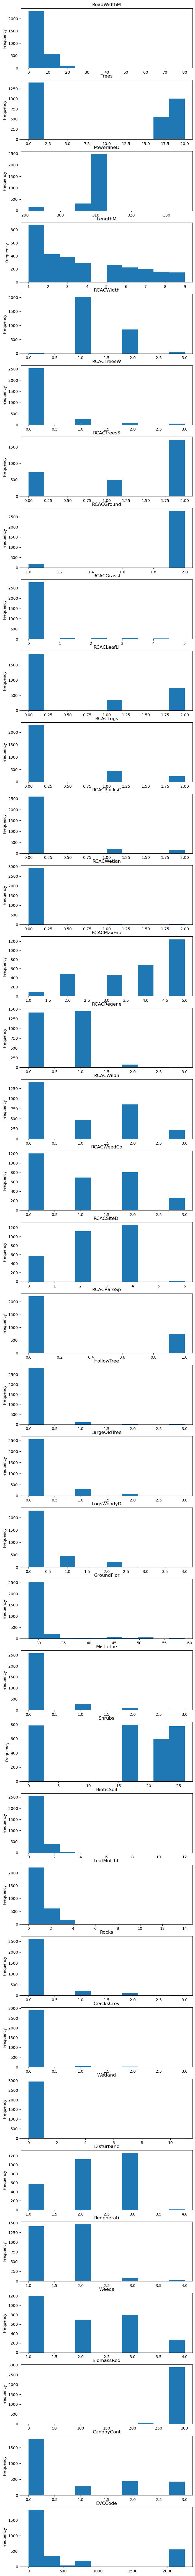

In [ ]:
fig, axes = plt.subplots(len(numerical_columns),figsize=(8, 120))

for ax, feature in zip(axes, numerical_columns):
    df[feature].plot(kind='hist', ax=ax)
    ax.set_title(feature)

In [ ]:
from sklearn.preprocessing import  RobustScaler

df[numerical_columns] = RobustScaler().fit_transform(df[numerical_columns])

# Encoding

👇 Investigate the non-numerical features that require encoding, and apply 'One hot encoding'. To ensure that we do not end up with an explosion of feature, we will retain only categorical features with <15 unique values for encoding.

So your task is the following:

1. Identify programmatically all of the categorical features that have <15 unique categories and require 'One Hot encoding'
2. In the dataframe, replace the original features by their encoded version(s). Make sure to drop the original features, as well as the features with >15 unique categories from `df`

In [ ]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells
ohe_features = df.dtypes[df.dtypes==object].index.values

In [ ]:
ohe_features

array(['ZoneName', 'SiteCode', 'DateStart', 'DateFinish',
       'ZoneDescription', 'AdjoiningV', 'Locality', 'LandFormLS',
       'SoilType', 'EVCNotes'], dtype=object)

In [ ]:
small_ohe = []

for feature in ohe_features:
    if (df[feature].nunique()<15):
        small_ohe.append(feature)
small_ohe

['AdjoiningV', 'SoilType']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder().fit(df[small_ohe])

# horizontal stack of the two arrays
columns = np.hstack(ohe.categories_)

# Create an array of one hot encoded values
ohe_df = pd.DataFrame(ohe.transform(df[small_ohe]).toarray(), columns=columns)

# Reset indexes so both dfs have the same (important: drop=True to avoid keeping index as a column)
df.reset_index(inplace=True, drop=True)
ohe_df.reset_index(inplace=True, drop=True)

# Join the one hot encoded values to the original dataframe
df = df.join(ohe_df)

# Drop ALL original categorical variables from the dataframe and check it visually
df.drop(ohe_features, axis=1, inplace=True)
df

,LengthM,RoadWidthM,WidthVarie,RCACWidth,RCACTreesW,RCACTreesS,RCACGround,RCACGrassl,RCACLeafLi,RCACLogs,...,de,ma,rg,st,szb,yd,ye,yf,yk,yt
0,0.00,-0.5,0,0.0,0.0,-2.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,-0.5,0,0.0,0.0,-2.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.50,0.0,0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.50,0.0,0,0.0,3.0,-1.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.50,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2954,0.25,0.0,0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2955,0.50,0.0,0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2956,0.50,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2957,0.50,0.0,0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df.columns.values

array(['LengthM', 'RoadWidthM', 'WidthVarie', 'RCACWidth', 'RCACTreesW',
       'RCACTreesS', 'RCACGround', 'RCACGrassl', 'RCACLeafLi', 'RCACLogs',
       'RCACRocksC', 'RCACWetlan', 'RCACMaxFau', 'RCACRegene',
       'RCACWildli', 'RCACWeedCo', 'RCACSiteDi', 'RCACRareSp',
       'HollowTree', 'LargeOldTree', 'Trees', 'LogsWoodyD', 'GroundFlor',
       'Mistletoe', 'Shrubs', 'BioticSoil', 'LeafMulchL', 'Rocks',
       'CracksCrev', 'Wetland', 'Disturbanc', 'Regenerati', 'Weeds',
       'Powerline', 'BiomassRed', 'PowerlineD', 'CanopyCont', 'EVCCode',
       'e', 'e/sb', 'eh', 'ei', 'en', 'h', 'i', 'i+e', 'in', 'n', 'sb',
       'sb/e', 'SoilTypeNA', 'dd', 'de', 'ma', 'rg', 'st', 'szb', 'yd',
       'ye', 'yf', 'yk', 'yt'], dtype=object)

# Base Modelling

👇 Cross validate a Linear regression model. Save its score under variable name `base_model_score`.

In [ ]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

X = df

cross_val = cross_validate(estimator=LinearRegression(),X=X, y=y, cv=5)

base_model_score = cross_val['test_score'].mean()
base_model_score

-1.0752006937482739e+18